In [1]:
df = pd.read_parquet('walmart.parquet')
df.head(1)

,weekly_sales,sid,dept,store,type,size,temperature_stdev,fuel_price_avg,fuel_price_stdev,cpi_avg,cpi_stdev,unemployment_avg,unemployment_stdev,holidayfreq
0,6,253385,5,24,1,203819,34.785,9.963135,3.499,0.268701,134.613271,2.638256,8.3645,0.126572


In [2]:
from sklearn.model_selection import train_test_split

X = df[df.columns[df.columns != 'weekly_sales']]
y = df['weekly_sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [4]:
import xgboost as xgb 

clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [5]:
fts = zip(X_train.columns, clf.feature_importances_)
sorted(fts, key=lambda x:x[1], reverse=True)

[('size', 0.2645151),
 ('dept', 0.25652468),
 ('type', 0.13793713),
 ('store', 0.092091985),
 ('holidayfreq', 0.090175994),
 ('cpi_stdev', 0.0428144),
 ('unemployment_stdev', 0.04145013),
 ('unemployment_avg', 0.028289286),
 ('temperature_stdev', 0.01884017),
 ('cpi_avg', 0.0115544),
 ('fuel_price_stdev', 0.00832406),
 ('sid', 0.005226042),
 ('fuel_price_avg', 0.0022566735)]

In [8]:
from sklearn.metrics import mean_squared_error  

pred = clf.predict(X_test)
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 0.919100


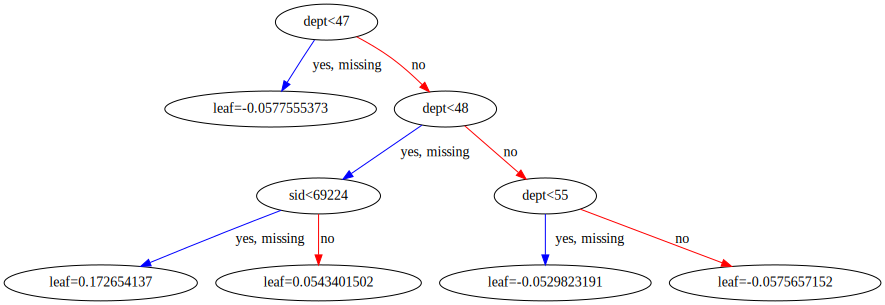

In [7]:
xgb.to_graphviz(clf)

In [9]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(
    clf,
    X_train,
    y_train,
    target_name='weekly_sales',
    feature_names=X.columns,
    class_names=['1', '2', '3', '4', '5', '6', '7'])
                                                                                                                                            
viz.view()

AttributeError: 'XGBClassifier' object has no attribute 'class_weight'